In [1]:
## Import libraries
import random
import numpy as np
import pandas as pd

<hr />

## Method 1: Dealing with list of values

In [ ]:
y_true = []
# Set a length of the list 
for i in range(0, 23000):
    # any random numbers from 0 to 1
    y_true.append(random.randint(0, 1))
#print(y_true)

In [ ]:
y_pred = []
# Set a length of the list 
for i in range(0, 23000):
    # any random numbers from 0 to 1
    y_pred.append(random.randint(0, 1))
#print(y_pred)

<hr />

## Method 2: Dealing with list of labels

In [2]:
v = ["THREAT", "NOT THREAT"]
l = [v for i in range(1500)]
t = [element for sublist in l for element in sublist]
random.shuffle(t)
y_true = t
len(y_true)

3000

In [3]:
unique = list(set(y_true))
frequency = {}
for item in unique:
    frequency[item] = y_true.count(item)
print("Frequency of items: ", frequency)

Frequency of items:  {'NOT THREAT': 1500, 'THREAT': 1500}


In [4]:
v = ["THREAT", "NOT THREAT", "NOT ASSESSED", "NONE"]
l = [v for i in range(750)]
p = [element for sublist in l for element in sublist]
random.shuffle(p)
y_pred = p
len(y_pred)

3000

In [5]:
unique = list(set(y_pred))
frequency = {}
for item in unique:
    frequency[item] = y_pred.count(item)
print("Frequency of items: ", frequency)

Frequency of items:  {'NOT THREAT': 750, 'NOT ASSESSED': 750, 'THREAT': 750, 'NONE': 750}


In [6]:
true = pd.DataFrame (y_true, columns = ['true'])
pred = pd.DataFrame (y_pred, columns = ['pred'])
frames = [true,pred]
df = pd.concat(frames, axis=1)

In [7]:
df = df[df.pred != 'NOT ASSESSED']
df = df[df.pred != 'NONE']

In [8]:
df

,true,pred
3,NOT THREAT,THREAT
5,NOT THREAT,THREAT
7,NOT THREAT,NOT THREAT
12,NOT THREAT,THREAT
13,THREAT,THREAT
...,...,...
2994,THREAT,NOT THREAT
2995,THREAT,THREAT
2997,NOT THREAT,NOT THREAT
2998,THREAT,THREAT


In [9]:
df.count()

true    1500
pred    1500
dtype: int64

In [10]:
y_true = df['true'].to_numpy()

In [11]:
y_pred = df['pred'].to_numpy()

<hr />

## Confusion Matrix

### Using Matplotlib

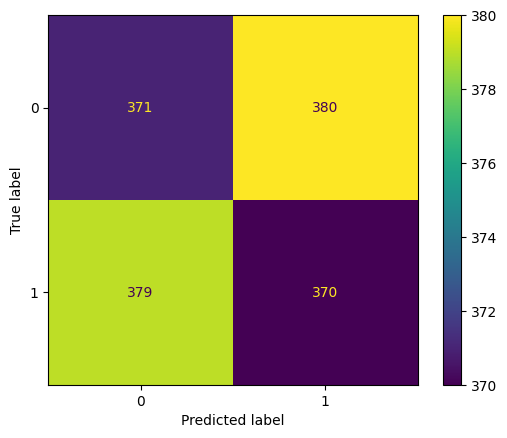

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(y_true, y_pred)

cm = confusion_matrix(y_true, y_pred, labels=None)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)
disp.plot()
plt.show()

## Using Seaborn

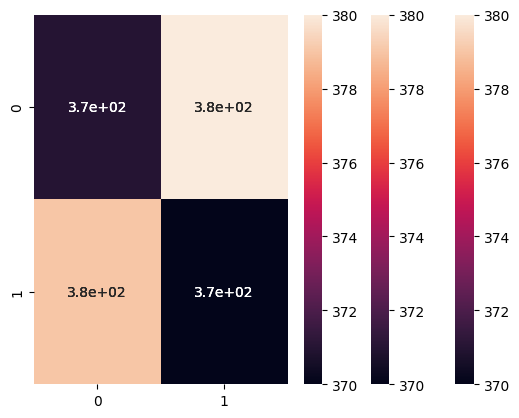

In [18]:
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.show()

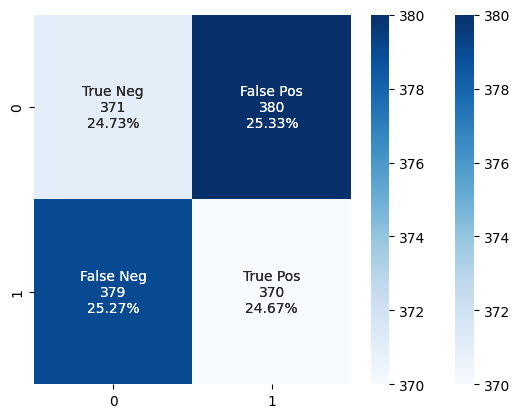

In [23]:
cf_matrix = cm
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.show()